In [5]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

data = pd.read_csv('combined_data.csv')


data['text'] = data['text'].str.lower()

punctuations = string.punctuation
stop_words = set(stopwords.words('english'))  # Используем английские стоп-слова

def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['text'] = data['text'].apply(clean_text)

display(data.head(30))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection cnn com wednesday escapenu...
3,1,university degree obtain prosperous future mon...
4,0,thanks answers guys know checked rsync manual ...
5,0,larry king live escapenumber escapenumber p et...
6,0,michael pobega wrote sure mpl mozilla allow di...
7,0,hi error tr sample escapenumber escapenumber e...
8,1,works gateway world art explore tattooing full...
9,1,upon account cautious escapenumber men would w...


In [6]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

data['text'] = data['text'].apply(lemmatize_text)

Лемматизация приводит слово к его словарифицированной начальной форме на основе правил грамматики языка и морфологического анализа.

Как работает:

Алгоритм анализирует слово с учетом его части речи (глагол, существительное и т.д.) и использует словарь или модель языка для нахождения правильной формы. Поэтому лемматизация точнее, но требует больше ресурсов

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

In [8]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


Что делает:

Bag of Words преобразует текст в вектор, основанный на частотах слов.
Он не учитывает порядок слов или их семантическое значение, только факт их наличия и количество в тексте.

Как работает:

Создается словарь всех уникальных слов в корпусе текстов.
Для каждого текста считается, сколько раз каждое слово из словаря встречается в этом тексте.
Результат: текст представляется как вектор частот.

In [8]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Что делает:
TF-IDF улучшает BoW, взвешивая частоты слов с учетом их важности в документе и в корпусе текстов. Он показывает как часто слово встречается в тексте и уменьшает вес слов, которые встречаются во многих текстах, затем перемножает эти параметры

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid.fit(X_train_tfidf, y_train)

best_lr = grid.best_estimator_



In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 150], 'max_depth': [20,30]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train_tfidf, y_train)

best_rf = grid.best_estimator_

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid.fit(X_train_tfidf, y_train)

best_xgb = grid.best_estimator_

{'Accuracy': 0.9887956860395446, 'Precision': 0.9888178790562958, 'Recall': 0.9887956860395446, 'F1-Score': 0.988793533229022}


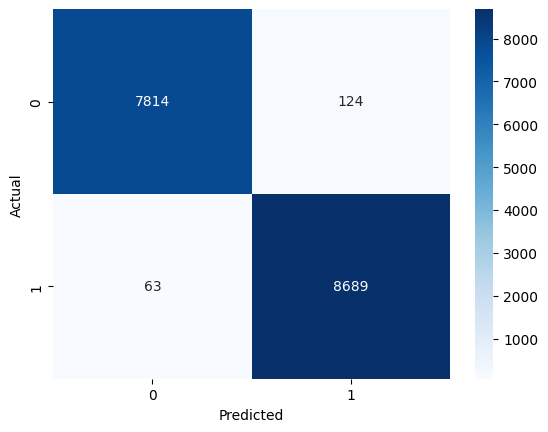

{'Accuracy': 0.926303175554224, 'Precision': 0.9322602395394585, 'Recall': 0.926303175554224, 'F1-Score': 0.9258114171560429}


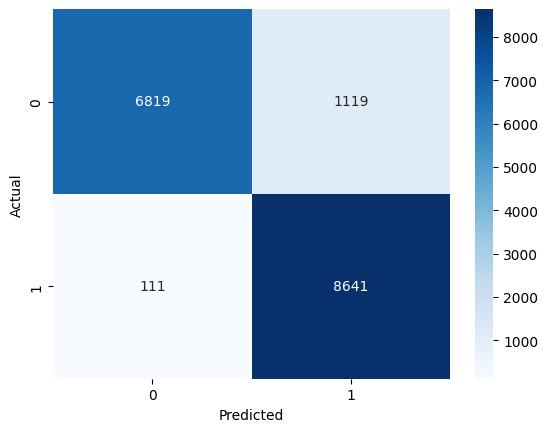

{'Accuracy': 0.9828040742959856, 'Precision': 0.9829598978737504, 'Recall': 0.9828040742959856, 'F1-Score': 0.9827946314210478}


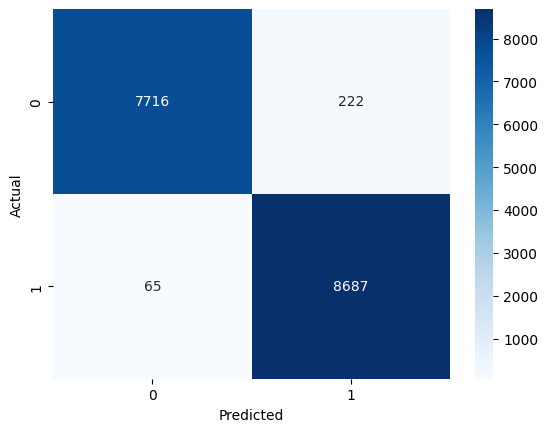

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }
    print(metrics)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(best_lr, X_test_tfidf, y_test)
evaluate_model(best_rf, X_test_tfidf, y_test)
evaluate_model(best_xgb, X_test_tfidf, y_test)


Почти на всех способах удалось выбить accuracy > 97. При этом с помощью random forest тоже можно подняв параметры, но collab дропается

In [9]:

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter = 500), param_grid, cv=3)
grid.fit(X_train_bow, y_train)

best_lr = grid.best_estimator_

In [10]:

param_grid = {'n_estimators': [100, 150], 'max_depth': [10,20]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train_bow, y_train)

best_rf = grid.best_estimator_

In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(param_grid, cv=3)
grid.fit(X_train_bow, y_train)

best_xgb = grid.best_estimator_

{'Accuracy': 0.985080886758538, 'Precision': 0.9850972122298731, 'Recall': 0.985080886758538, 'F1-Score': 0.9850783199600963}


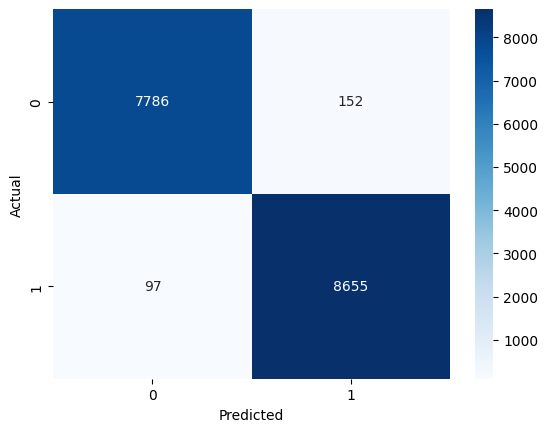

{'Accuracy': 0.8987417615338527, 'Precision': 0.9121390770047512, 'Recall': 0.8987417615338527, 'F1-Score': 0.897397228793245}


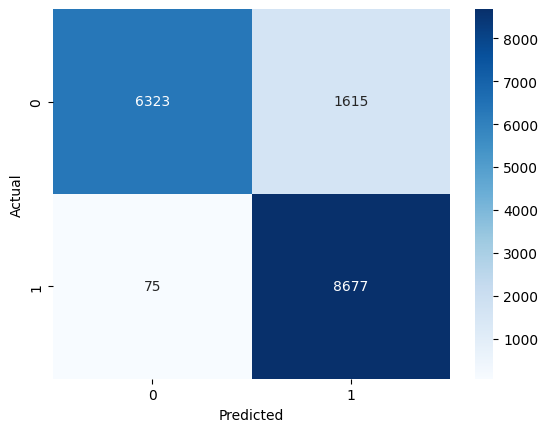

In [11]:
evaluate_model(best_lr, X_test_bow, y_test)
evaluate_model(best_rf, X_test_bow, y_test)

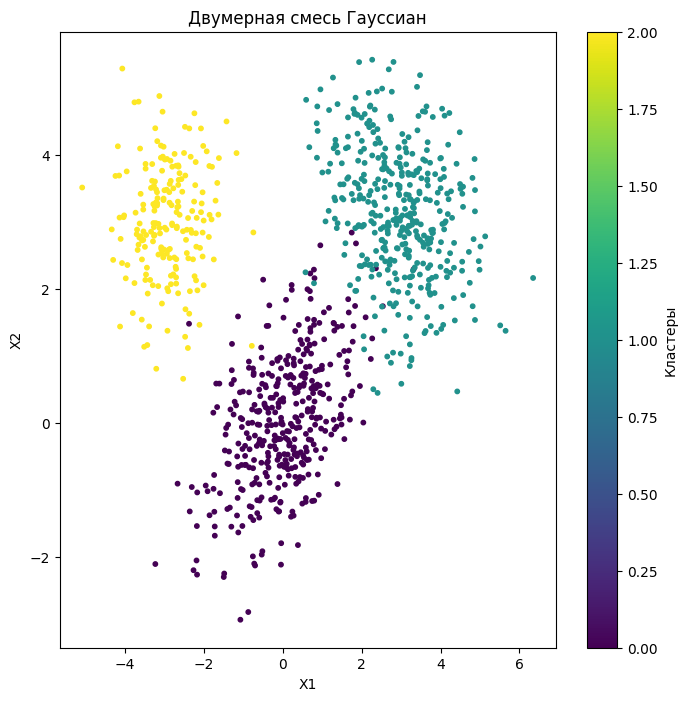

In [ ]:
# Генерация данных
np.random.seed(42)
n_samples = 1000
means = [[0, 0], [3, 3], [-3, 3]]
covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.4], [-0.4, 1]], [[0.5, 0], [0, 0.75]]]
weights = [0.4, 0.4, 0.2]

X = np.zeros((n_samples, 2))
labels = np.zeros(n_samples, dtype=int)
current = 0

for i, (mean, cov, weight) in enumerate(zip(means, covariances, weights)):
    n_cluster_samples = int(n_samples * weight)
    X[current : current + n_cluster_samples, :] = np.random.multivariate_normal(mean, cov, n_cluster_samples)
    labels[current : current + n_cluster_samples] = i
    current += n_cluster_samples

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Двумерная смесь Гауссиан")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Кластеры")
plt.show()

Лучшее K: 3


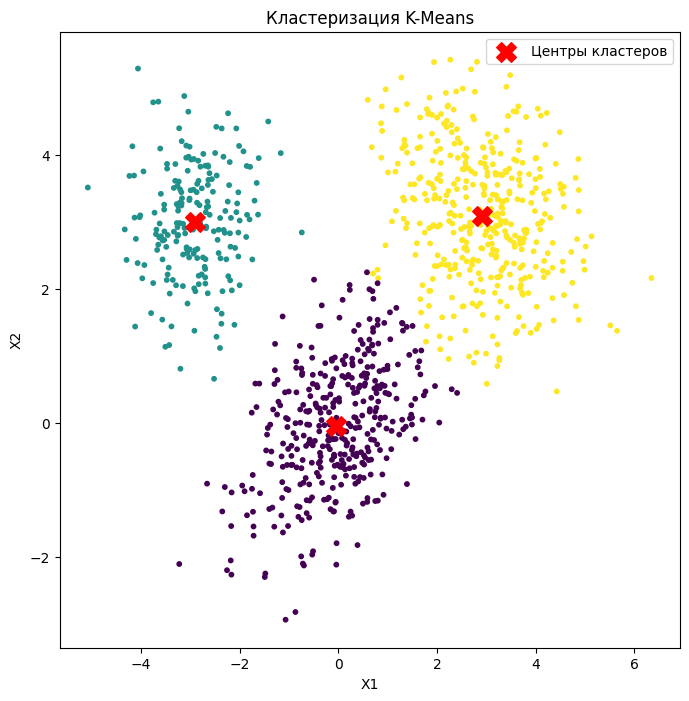

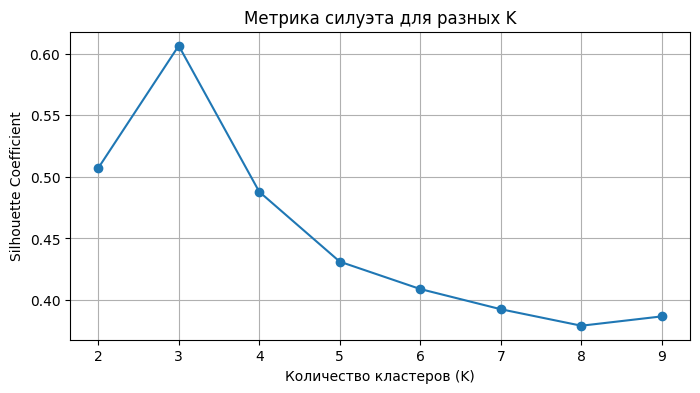

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix

silhouette_scores = []
k_values = range(2, 10)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
print(f"Лучшее K: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Центры кластеров')
plt.title("Кластеризация K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Метрика силуэта для разных K")
plt.xlabel("Количество кластеров (K)")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)
plt.show()


Лучшие параметры DBSCAN: eps=1.0, min_samples=71
Лучший BCubed: 0.8610


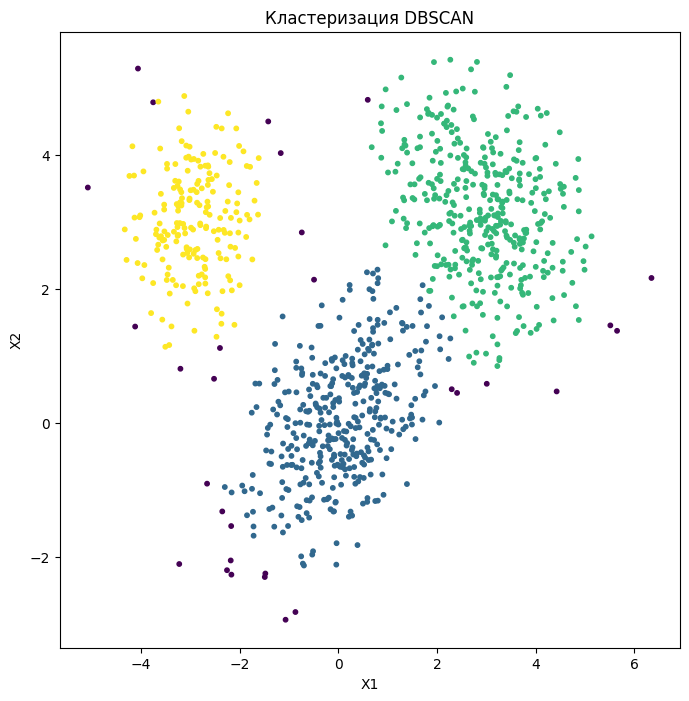

In [ ]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

def bcubed(true_labels, predicted_labels):
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    completeness = completeness_score(true_labels, predicted_labels)
    return 2 * (homogeneity * completeness) / (homogeneity + completeness)

eps_values = np.arange(0.1, 4, 0.1)
min_samples_values = range(1, 100)
best_bcubed = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)
        if len(set(dbscan_labels)) > 1:
            score = bcubed(labels, dbscan_labels)
            if score > best_bcubed:
                best_bcubed = score
                best_params = (eps, min_samples)

best_eps, best_min_samples = best_params
print(f"Лучшие параметры DBSCAN: eps={best_eps}, min_samples={best_min_samples}")
print(f"Лучший BCubed: {best_bcubed:.4f}")

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Кластеризация DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


В итоге из этих двух методов лучше справился метод k means так как ему легче разбить сгруппированные в одну кучу кластеры, будь тут хаотичные кластеры лучше бы справился DNSCAN

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

class GaussianMixtureEM:
    def __init__(self, n_components=3, max_iter=100, tol=1e-6):
        self.n_components = n_components 
        self.max_iter = max_iter         
        self.tol = tol                 

    def _initialize_parameters(self, X):
        n_samples, n_features = X.shape
        np.random.seed(42)

        self.pi = np.ones(self.n_components) / self.n_components

        self.mu = X[np.random.choice(n_samples, self.n_components, replace=False)]

        self.sigma = np.array([np.eye(n_features) for _ in range(self.n_components)])

    def _e_step(self, X):
        n_samples = X.shape[0]
        self.resp = np.zeros((n_samples, self.n_components))

        for k in range(self.n_components):
            self.resp[:, k] = self.pi[k] * multivariate_normal.pdf(X, mean=self.mu[k], cov=self.sigma[k])
        self.resp /= self.resp.sum(axis=1, keepdims=True)

    def _m_step(self, X):
        n_samples = X.shape[0]
        self.Nk = self.resp.sum(axis=0)  

        self.pi = self.Nk / n_samples

        for k in range(self.n_components):
            self.mu[k] = np.sum(self.resp[:, k][:, np.newaxis] * X, axis=0) / self.Nk[k]

        for k in range(self.n_components):
            diff = X - self.mu[k]
            self.sigma[k] = np.dot((self.resp[:, k][:, np.newaxis] * diff).T, diff) / self.Nk[k]

    def fit(self, X):
        self._initialize_parameters(X)
        log_likelihood_old = 0

        for iteration in range(self.max_iter):
            self._e_step(X) 
            self._m_step(X)  

            log_likelihood = np.sum(np.log(np.sum([
                self.pi[k] * multivariate_normal.pdf(X, mean=self.mu[k], cov=self.sigma[k])
                for k in range(self.n_components)
            ], axis=0)))

            if np.abs(log_likelihood - log_likelihood_old) < self.tol:
                print(f"Сошлось на итерации {iteration}")
                break
            log_likelihood_old = log_likelihood

    def predict(self, X):
        probs = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            probs[:, k] = self.pi[k] * multivariate_normal.pdf(X, mean=self.mu[k], cov=self.sigma[k])
        return np.argmax(probs, axis=1)


Сошлось на итерации 26


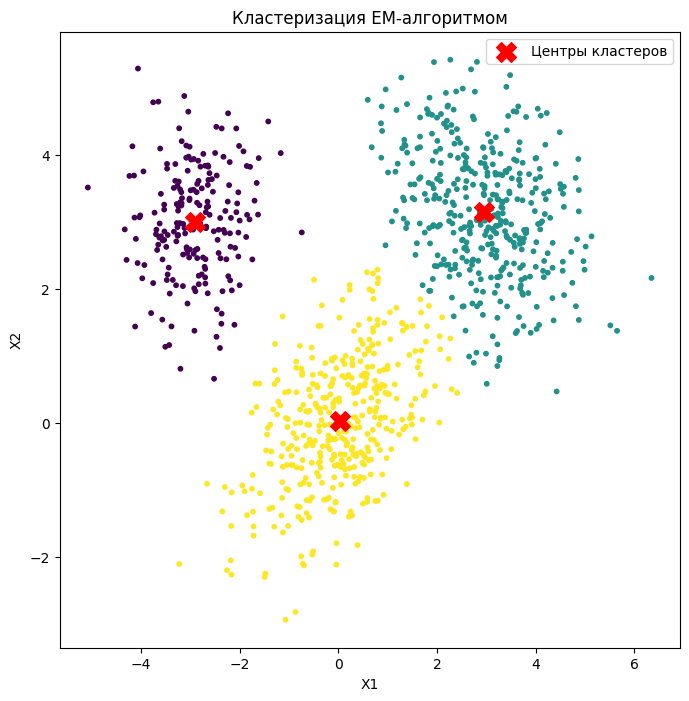

In [ ]:

em_model = GaussianMixtureEM(n_components=3, max_iter=100, tol=1e-6)
em_model.fit(X)

em_labels = em_model.predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis', s=10)
plt.scatter(em_model.mu[:, 0], em_model.mu[:, 1], color='red', marker='X', s=200, label='Центры кластеров')
plt.title("Кластеризация EM-алгоритмом")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


EM справился также хорошо, как и k means, опять же из-за того, что кластеры сгруппированы в кучу вокруг какого-то центра группы